# **Reto Fase 3 y 4**

Alejandro Fabrizio Castañeda Robles(A01745672)

David Antonio Gonzalez Muñoz (A01746309)

Ana Michele Hay Robles (A01378047)

Jair Manzanera Resendiz (A01753041)

Diego Jiménez Pasillas (A01745889)

Rodrigo Iván Trejo Hernández (A01745075)

# Fase 3

Queremos crear una "ciudad" con distribución de personas diferente. Con $\bf{D}$ indicamos el "tamaño" de la ciudad y con $\bf{N}$ el número de personas de la ciudad.

In [7]:
N = 300  
D = 100  

La simulación se puede hacer en equipo, sólo en la primera actividad, donde se crea la "ciudad", cada miembro del equipo elige una ciudad diferente. Si el grupo está formado por más que 4 personas, dos personas pueden trabajar juntas.


###Ciudad cuadrada distribución uniforme


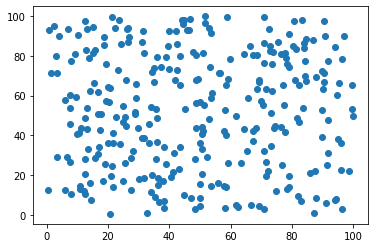

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

N=300
#### Crear los arrays xpos, ypos usando np.random.uniform() que representan las coordinadas (xpos,ypos) de las N personas
#### Pueden elegir los valores límite considerando que las N personas deben quedarse adentro de la ciudad
xpos = np.random.uniform(0,100,N)
ypos = np.random.uniform(0,100,N)

plt.scatter(xpos,ypos) #Plot para visualizar las personas

###Ciudad circular distribución uniforme

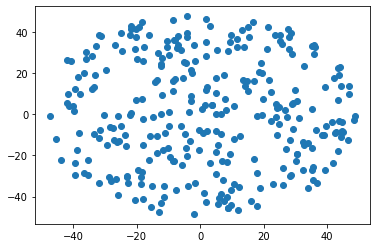

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import math
R = D/2 #radio de la distribución

### Generar N valores aleatorios entre 0 y 1 con la función np.random.uniform() y multiplicarlos por 2*math.pi
### para generar valores aleatorios de ángulos entre 0 y 2*Pi
alpha = np.random.uniform(0,1,N) * (2*math.pi)
### Generar N valores del radio r como R*np.sqrt(d), donde d son N aleatorios entre 0 y 1 generados con np.random.uniform()
### Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.
r = R*np.sqrt(np.random.uniform(0,1,N))


### Convertir de coordenadas polares a cartesianas para generar las posiciones (xpos, ypos) de las N personas
xpos = r*np.cos(alpha)
ypos = r*np.sin(alpha)
plt.scatter(xpos,ypos)

###Ciudad cuadrada distribución en cluster


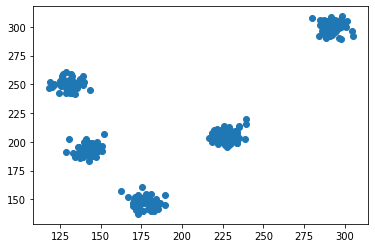

In [25]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N=300
n_clusters = 5 #Para seleccionar el número de clusters
nn = N // n_clusters

### Usando np.random.uniform() generar las coordenadas de centro (x0,y0) de cada cluster (en número igual a n_clusters)
### Usar como límites los límites de la ciudad
x0 = np.random.uniform(size=n_clusters, low=N, high=D)
y0 = np.random.uniform(size=n_clusters, low=N, high=D)

###Aquí abajo se crean los arrays vacíos para las posiciones (xpos,ypos) de las N personas
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
### que tenga media igual a y0[i] y desviación estándar igual a D/20.
for i in range(n_clusters):
  xpos[i] = np.random.normal(x0[i], D/20, nn)
  ypos[i] = np.random.normal(y0[i], D/20, nn)

##En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

plt.scatter(xpos,ypos)

###Ciudad circular distribución en cluster

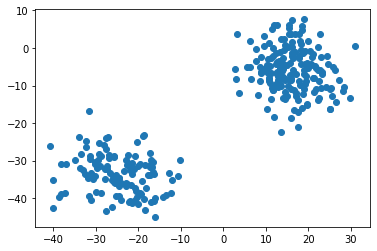

In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

n_clusters = 5 #Para seleccionar el número de clusters
nn = N // n_clusters

R = D/2
##Generar aleatorios con distribución uniforme entre 0 y 1 (en número igual a n_clusters) 
##para el ángulo de cada cluster usando np.random.uniform() y multiplicándolo por 2*math.pi
alpha = np.random.uniform(0,1,n_clusters)*2*math.pi

### Generar los radios r como R*np.sqrt(d), donde d son aleatorios con distribución uniforme (en número igual a n_clusters) entre 0 y 1
###Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.
r = R * np.sqrt(np.random.uniform(0,1,n_clusters))

### Calcular las posiciones del centro de cada clusters convirtiendo de coordenadas polares a cartesianas
x0 = r*np.cos(alpha)
y0 = r*np.sin(alpha)
### Se crean arrays para las posiciones
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
### que tenga media igual a y0[i] y desviación estándar igual a D/20.
for i in range(n_clusters):
  xpos[i] = np.random.normal(x0[i],D/20,nn)
  ypos[i] = np.random.normal(y0[i],D/20,nn)
###En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

plt.scatter(xpos,ypos)

In [26]:
  #Definimos la condición (status) de las personas como "susceptible", "infected","recovered","dead" 
import numpy as np


N = 300

#Condiciones iniciales:
I0  = 2 #número infectados inicial
R0 = 1 #número recuperados inicial
D0 = 1 #número muertos inicial
S0 = N-I0-D0-R0 #Número de susceptibles inicial


infection_radius = 0.6  #distancia para decidir si una persona se infecta o no
recovery_rate = 0.0006
death_rate = 0.001

### Definir un array donde aparezca un número de elementos "susceptible" igual a S0, un número de elementos "infected" igual a I0,
### un número de elementos "recovered" igual a R0 y un número de elementos "dead" igual a D0
## Sug.:usar np.repeat()

x = np.array(['susceptible', 'infected', 'recoverd', 'dead'])
status = np.repeat(x, [S0,I0,R0,D0])


### Crear un array de N elementos iguales a 0 (usar np.repeat())
iteration = np.repeat(0,N)
### Crear un array de N elementos que contenga valores de 1 a N
id = [i+1 for i in range(N)]

In [27]:
## Aquí se crea un dataframe con las columnas 'xpos', 'ypos', 'status','iteration' y 'id'
import pandas as pd

df = pd.DataFrame()
df['xpos']=xpos
df['ypos']=ypos
df['status']=status
df['status'] = df['status'].astype('category')
df['iteration']=iteration
df['id']=id

In [ ]:
df

,xpos,ypos,status,iteration,id
0,-2.240146,41.808285,susceptible,0,1
1,0.878912,38.346931,susceptible,0,2
2,1.405528,47.656252,susceptible,0,3
3,-4.275554,36.961772,susceptible,0,4
4,3.939916,41.254517,susceptible,0,5
5,-8.113551,48.332497,susceptible,0,6
6,-0.689508,42.177777,susceptible,0,7
7,-4.845973,42.322201,susceptible,0,8
8,-0.558820,41.845590,susceptible,0,9
9,0.518617,53.949021,susceptible,0,10


In [28]:
## Escribir una función que mide la distancia euclidiana entre dos puntos A=(x1,y1) y B=(x2,y2) y 
###regresa True si la distancia es menor que el radio de infección "infection_radius" definido arriba
from scipy.spatial import distance
def infec(A,B,infection_radius):
  d=distance.euclidean(A, B)
  if d < infection_radius:
    return True
  else:
    return False
      


Bucle con iteraciones

# Fase 4

In [ ]:
dd = D0
n_iter = 100

In [29]:
for i in range(1,20):
  copia_df = df.loc[df['iteration']==i-1,:]
  des_x=np.random.normal(0,1*0.5,N)
  des_y=np.random.normal(0,1*0.5,N)
  #print(len(des_x))
  copia_df['xpos']=xpos+des_x
  copia_df['ypos']=ypos+des_y
  df_inf=df['status']=='infected'
  infectados=df[df_inf]
  for x in range(len(infectados)):
    for y in range(len(copia_df)):
      if copia_df.iloc[y,2]=='infected':
        continue
      A=[infectados.iloc[x,0],infectados.iloc[x,1]]
      B=[copia_df.iloc[y,0],copia_df.iloc[y,1]]
      if infec(A,B,infection_radius)==True:
        copia_df.iloc[y,2]='infected'
  num_r=np.random.uniform(0,1,len(infectados)) 
  #recov=np.where(num_r<recovery_rate)
  for t in range(len(infectados)):
    if(num_r[t]<recovery_rate):
      #print('si entro')
      infectados.iloc[t,2]='recovered' 
      #print(infectados.iloc[t,2])
  for w in range(len(infectados)):
    #print(infectados.iloc[w,2])
    if(infectados.iloc[w,2]=='recovered'):
      #print('entre 2')
      id=infectados.iloc[w,4]
      copia_df.loc[copia_df['id']==id,'status']='recovered'
  copia_df['iteration']=i
  df = df.append(copia_df)         
  df.reset_index(drop=True, inplace=True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [30]:
import plotly.express as px
px.scatter(df, x="xpos", y="ypos", animation_frame="iteration", color="status", hover_name="status",color_discrete_sequence=px.colors.qualitative.Safe)

https://plotly.com/python/discrete-color/